# LSTM & RNN

Prediction des nächsten Wertes einer linearen Funktion:

Predicted number after 100: 101.15776062011719


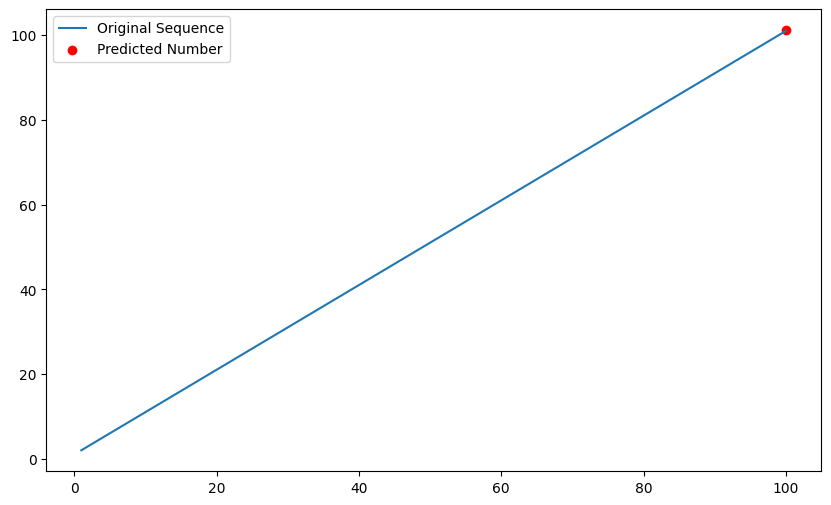

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generating a simple linear sequence of numbers from 1 to 100 as input (X)
# and a sequence shifted by one as the target (y) for prediction.
# This synthetic dataset is created to demonstrate a simple pattern learning by LSTM.
X = np.arange(1, 101, 1).reshape(-1, 1)  # Input sequence
y = np.arange(2, 102, 1).reshape(-1, 1)  # Target sequence

# LSTM expects input in the format of [samples, time steps, features].
# Here, each number in the sequence is treated as a single time step with one feature.
# Reshaping the input data to fit this requirement.
X = X.reshape((X.shape[0], 1, 1))

# Define the LSTM model architecture.
# Using a single LSTM layer with 50 units to learn the sequence pattern.
# The choice of 50 units is arbitrary for this simple example; however, it provides enough complexity to learn the pattern.
# The 'relu' activation function is used for its simplicity and effectiveness in many scenarios.
# The model ends with a Dense layer with one neuron to predict the next number in the sequence.
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(1, 1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')  # Using 'adam' optimizer and 'mse' loss for regression problem.

# Training the model on the synthetic data.
# The number of epochs is set to 200 for demonstration, indicating the model will see the dataset 200 times.
# In practice, the number of epochs should be chosen based on validation performance.
model.fit(X, y, epochs=200, verbose=0)

# Predicting the next number in the sequence after the last number in our dataset (100).
test_input = np.array([100]).reshape((1, 1, 1))  # Preparing the input in the correct shape for prediction.
predicted_number = model.predict(test_input, verbose=0)  # Making the prediction.
print(f"Predicted number after 100: {predicted_number[0][0]}")

# Visualizing the original sequence and the predicted next number using matplotlib.
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 101), y, label='Original Sequence')
plt.scatter(100, predicted_number[0][0], color='red', label='Predicted Number')  # Marking the predicted number in red.
plt.legend()
plt.show()

Prediction einer nicht-linearen Funktion(Sinuswelle):

Epoch 1/10
3/3 [==============================] - 1s 5ms/step - loss: 0.5010
Epoch 2/10
3/3 [==============================] - 0s 5ms/step - loss: 0.4514
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 0.4053
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 0.3575
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 0.3011
Epoch 6/10
3/3 [==============================] - 0s 4ms/step - loss: 0.2371
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 0.1681
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 0.0995
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: 0.0578
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.0711


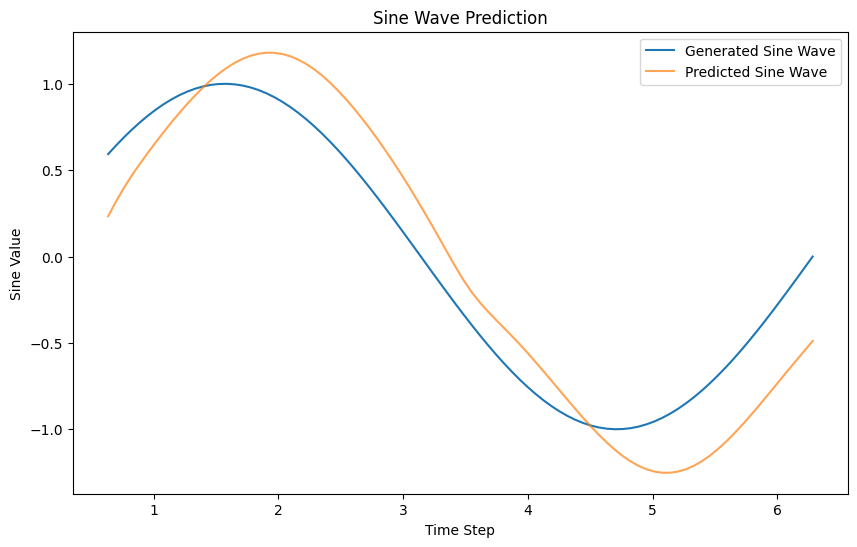

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate a sine wave dataset using numpy's sin function over a range of timesteps.
# This creates a periodic, non-linear pattern that serves as our dataset.
timesteps = np.linspace(0, 2 * np.pi, 100)  # 100 evenly spaced values between 0 and 2*pi
data = np.sin(timesteps)  # Apply the sine function to each timestep

# Prepare sequences from the sine wave data for the LSTM model.
# This function creates input-output pairs where each input sequence is used to predict the next value in the sequence.
def prepare_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        sequence = data[i:(i + sequence_length)]  # Extract a sequence of length 'sequence_length'
        label = data[i + sequence_length]  # The next value to be predicted
        X.append(sequence)
        y.append(label)
    return np.array(X), np.array(y)

sequence_length = 10  # Number of timesteps the model should consider for predicting the next value
X, y = prepare_sequences(data, sequence_length)

# Reshape input to fit the LSTM model: [samples, time steps, features].
# Each sample is a sequence, with 'sequence_length' time steps, and 1 feature per time step.
X = X.reshape((X.shape[0], sequence_length, 1))

# Define the LSTM model architecture.
# Two LSTM layers are used to capture the patterns in the sine wave more effectively.
# The first LSTM layer returns sequences, allowing the second LSTM layer to receive sequences of outputs, enhancing learning.
# The model ends with a Dense layer with a single neuron to predict the next value in the sequence.
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')  # Adam optimizer and MSE loss are standard choices for regression problems.

# Training the model on the sine wave sequences.
# The number of epochs is chosen to provide enough iterations for the model to learn the pattern.
model.fit(X, y, epochs=1, verbose=1)

# Using the trained model to predict the sine wave values based on the input sequences.
predicted = model.predict(X, verbose=0)

# Visualize the comparison between the original and predicted sine wave.
# This helps to assess how well the LSTM model has learned to predict the pattern of the sine wave.
plt.figure(figsize=(10, 6))
plt.plot(timesteps[sequence_length:], y, label='Generated Sine Wave')  # Plot using original timesteps offset by sequence_length
plt.plot(timesteps[sequence_length:], predicted, label='Predicted Sine Wave', alpha=0.7)  # Align predictions
plt.title('Sine Wave Prediction')
plt.xlabel('Time Step')
plt.ylabel('Sine Value')
plt.legend()
plt.show()

**Frage: Wie bringen Sie das LSTM dazu, die generierte Sinuswelle möglichst perfekt zu approximieren?**  
*Tipp: Schauen Sie sich obigen Code einmal genauer an*

Simulierte Zeitreihe mit einem nichtlinearen Trend und einer Saisonalität:

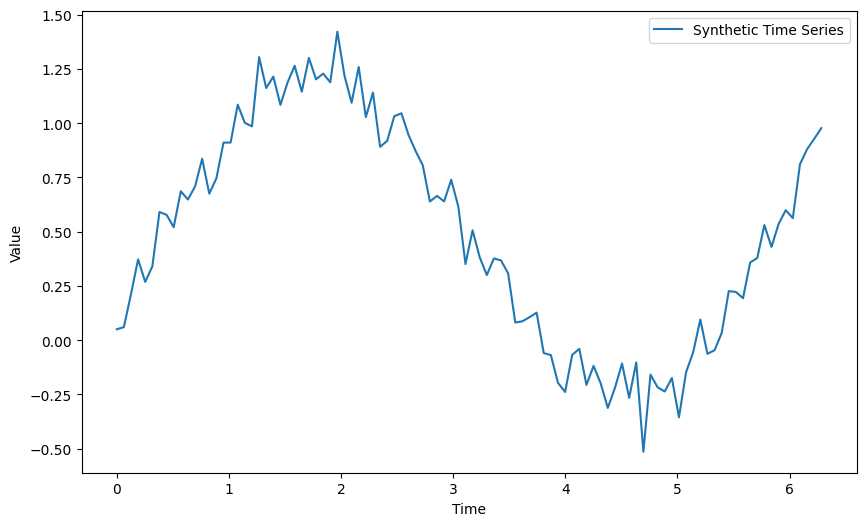

Epoch 1/300
1/1 [==============================] - 1s 746ms/step - loss: 0.4771
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 0.4589
Epoch 3/300
1/1 [==============================] - 0s 15ms/step - loss: 0.4438
Epoch 4/300
1/1 [==============================] - 0s 15ms/step - loss: 0.4298
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 0.4170
Epoch 6/300
1/1 [==============================] - 0s 12ms/step - loss: 0.4053
Epoch 7/300
1/1 [==============================] - 0s 12ms/step - loss: 0.3947
Epoch 8/300
1/1 [==============================] - 0s 13ms/step - loss: 0.3844
Epoch 9/300
1/1 [==============================] - 0s 12ms/step - loss: 0.3745
Epoch 10/300
1/1 [==============================] - 0s 13ms/step - loss: 0.3649
Epoch 11/300
1/1 [==============================] - 0s 13ms/step - loss: 0.3559
Epoch 12/300
1/1 [==============================] - 0s 12ms/step - loss: 0.3479
Epoch 13/300
1/1 [==============================

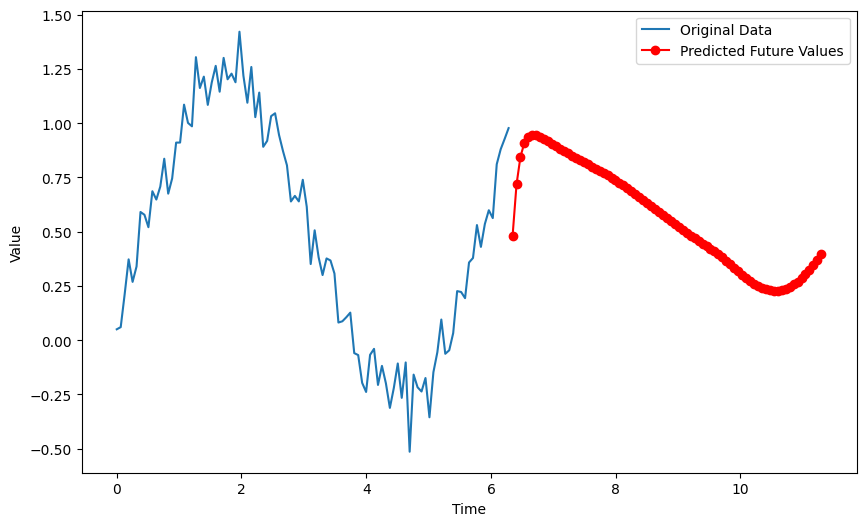

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a synthetic time series with non-linear trend, seasonality, and noise
time_steps = np.linspace(0, 2 * np.pi, 100)
data = np.sin(time_steps) + np.random.normal(0, 0.1, 100) + np.linspace(0, 1, 100)

# Visualize the generated time series
plt.figure(figsize=(10, 6))
plt.plot(time_steps, data, label='Synthetic Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Function to prepare the dataset for multi-step forecasting
def prepare_sequences(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data) - n_steps_in - n_steps_out + 1):
        seq_x = data[i:(i + n_steps_in)]
        seq_y = data[(i + n_steps_in):(i + n_steps_in + n_steps_out)]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define the number of steps in the input and output sequences
n_steps_in, n_steps_out = 20, 79 # Or e.g. 20, 49, 79
X, y = prepare_sequences(data, n_steps_in, n_steps_out)

# Reshape input to [samples, timesteps, features] for LSTM
X = X.reshape((X.shape[0], n_steps_in, 1))

# Build the LSTM model for multi-step forecasting
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(n_steps_in, 1)),
    tf.keras.layers.RepeatVector(n_steps_out),
    tf.keras.layers.LSTM(50, activation='relu', return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=300, verbose=1)

# Prepare the last sequence from the input data as the input for prediction
x_input = data[-n_steps_in:].reshape((1, n_steps_in, 1))
predicted = model.predict(x_input, verbose=0).flatten()

# Correct calculation for prediction start point
prediction_start = time_steps[-1] + (time_steps[1] - time_steps[0])

# Generate new timesteps for the predictions, assuming consistent time step difference (delta)
delta = time_steps[1] - time_steps[0]
prediction_timesteps = np.arange(prediction_start, prediction_start + (n_steps_out * delta), delta)

# Plot the original data and the predicted values with corrected alignment
plt.figure(figsize=(10, 6))
plt.plot(time_steps, data, label='Original Data')  # Plot the entire original dataset
plt.plot(prediction_timesteps, predicted, 'r', label='Predicted Future Values', marker='o')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Klassifikation mit einem LSTM. Sequenzen mit steigendem Trend werden als Klasse 1 bezeichnet, Sequenzen mit fallendem Trend als Klasse 0. Das LSTM lernt, diese Muster zu erkennen und die Sequenzen entsprechend zu klassifizieren:

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Function to generate synthetic sequences and their labels
def generate_sequences(n_sequences=1000, n_steps=10):
    X, y = [], []
    for _ in range(n_sequences):
        
        # Start sequence with a random number
        start = np.random.rand()
        
        # Randomly decide if the sequence increases or decreases
        if np.random.rand() < 0.5:
            # Generate an increasing sequence and label it as 1
            sequence = np.linspace(start, start + 1, n_steps)
            label = 1
        else:
            # Generate a decreasing sequence and label it as 0
            sequence = np.linspace(start + 1, start, n_steps)
            label = 0
        X.append(sequence)
        y.append(label)
    return np.array(X), np.array(y)

# Generate synthetic sequences and their labels
n_sequences = 1000
n_steps = 10
X, y = generate_sequences(n_sequences, n_steps)

# Reshape X to [samples, timesteps, features] for LSTM and one-hot encode labels
X = X.reshape((X.shape[0], n_steps, 1))
y = to_categorical(y)

# Define LSTM model for sequence classification
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(n_steps, 1)),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=20, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f'Model Accuracy: {accuracy:.4f}')

# Demonstrate prediction
# Generate a new sequence
test_X, test_y = generate_sequences(1, n_steps)
test_X = test_X.reshape((1, n_steps, 1))
# Predict the class
predicted_class = model.predict(test_X, verbose=0)
print(f"Predicted class: {'Increasing' if np.argmax(predicted_class) == 1 else 'Decreasing'}")

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6512 - accuracy: 0.7410
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 1.0000
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 1.0000
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 11/20
32/32 [